# An Introduction to Linear Regression, Describing Data
In this section, we will introduce simple linear regression. We will define simple linear regression as linear regression where there is only one explanatory variable (this will be explained later). Our goal is to __describe the relationship__ between __the height and length of abalone__.

__Topics:__ Explanatory, Response, Independent, Dependent, Residuals, Correlation, Regression Line

__Linear Regression Learning Objectives__ 
* Variable Types
* Variable Relationships
* Plotting Variable Relationships using Scatterplots
* Interpreting Scatterplots

__Salmon Learning Objectives__ 
* Creating Variables
* Creating a Linear Regression Model
* Plotting a Linear Regression Model

### Importing Data

In [25]:
import pandas as pd
from salmon import *
%matplotlib inline
data = pd.read_csv("data/chapter1/lsd.csv")

## Introduction
The three main goals of linear regression are to describe a dataset, generate and predict future values, and analyze it. The following tutorials will guide you through linear regression topics related to these goals and will provide code examples using SALMON in Python. For this notebook, we will learn how to use simple linear regression to describe and investigate our dataset. 

#### Investigation: Drug Concentrations and Math Scores
To start, let's look at a dataset which measures a subjects' drug scores after being given a specific amount of LSD. Our goal is to formally prove that hard drugs _elevate_ the users thinking. Let's imagine that you have just collected some data points and want to start visualizing your results.  A great way to quickly visualize our data would be through scatterplots. Scatterplots are extremely important to linear regression. Scatterplots are used to identify patterns or outliers, explore relationships, and find clusters. Let's plot the drug concentration on the `X` axis and the math scores on the `Y` axis. <img src='images/chapter1/first_plot.png'>

Unsuprisingly, we can see that as the LSD concentration taken increases, the subject's math score decreases. But, we want to formally prove that the amount of LSD __explains__ the resulting math score. One of the main goals of simple linear regression is to see if one variable (the X variable) can explain another (the Y variable). Let's start formally exploring this relationship using __simple linear regression__.

## Variable Types

Before we jump into linear regression, we should clarify some terms. There are two main types of variables in simple linear regression, __response and explanatory variables__. The response variable or dependent variable is the focus of the study. This variable __measures the outcome__ of an experiment and is traditionally plotted on the Y axis. The explanantory variable or independent variable is the variable that __causes or explains the outcome__ of the response variable; this will be plotted on the X axis. For our dataset, let's make our explanatory variable the drug concentration and the math score be the response variable.

### Salmon Variable Types 

In Salmon, variables are represented using the `Q` wrapper and provide it the name of the variable. Lets start by making an explanatory and response variable. 

In [26]:
explanatory = Q("lsd")
response = Q("math")

## Describing Relationships with Scatterplots
The goal of simple linear regression is to examine the relationship between two variables. We want to see if we can __determine__ the effects of the __explanatory variable__ on the __response variable__. Let's look at our original scatterplot again.  <img src='images/chapter1/first_plot.png'>
From the plot, we can see that as as the LSD concentration taken increases, the subject's math score decreases. Formally, there are a few attributes we can use to describe this relationship: __strength and direction__.

##### Strength

The strength of the relationship can be viewed on a scatterplot. To do this, we look at how close the points on the scatter plot are to each other. This does not neccessarily mean that the points must be densely located in one specific area. In linear regression we hope to see the points follow the shape of a line.
<table><tr><td style="text-align:center">Strong Relationship<img src='images/chapter1/posAssoc.png'></td><td style="text-align:center">Weak Relationship<img src='images/chapter1/weak.png'></td><td style="text-align:center">No Relationship<img src='images/chapter1/noAssoc.png'></td></tr></table>

##### Direction
If the data has a clear direction, there is a __positive or negative association__. Data has a positive association when two variables tend to have low values paired together and high values paired together. For a negative association, when a low value is paired with a high value and vice versa.  Let's look at a couple of examples.
<table><tr><td style="text-align:center">Positive Association<img src='images/chapter1/posAssoc.png'></td><td style="text-align:center">Negative Association<img src='images/chapter1/negAssoc.png'></td><td style="text-align:center">No Association<img src='images/chapter1/noAssoc.png'></td></tr></table>

The first plot shows a clear direction with a positive association, increases in the x value result in an increase in the y values. For the second image, we see a negative association, lower values of x result in higher values of y. For the third plot, there is no clear direction and as a result, no association. 

<table><tr><td style="text-align:center">Abalone<img src='images/chapter1/first_plot.png'></td></tr></table>
From these measurements and examples, we can estimate that drug concentration and math score have a moderately strong relationship and a negative association. To formally measure strength and direction, we measure the __correlation__ between our explanatory and response variables.

## Correlation (r)
Correlation is denoted as r and measures both strength and direction (or association) between two variables regardless if one is an explantory or response variable. The correlation between two variables is given as a single number between -1 and 1. Strength is measured by seeing how close the correlation is to -1 or 1. So, a correlation score of 0.9 or -0.8 would imply an extremely strong relationship while a score of -0.5 or 0.1 would imply a weak relationship. To measure direction, we check if the correlation score is greater than or less than 0. When r > 0, there is a positive association. When r < 0, there is a negative association. Overall, if the correlation score is closer to 1, it is consider positive correlation. If the correlation score is closer to -1, it is consider negative correlation. This score is extremely important because if we square the correlation, it can __explain the variability that one variable causes in another__. For example, if create a linear model explaining the effects of x on y and the correlation between them is -0.6 then 36% of the variability in y is explained by x.

#### Calculating Correlation
Prior to calculating the correlation, we need to calculate the mean and standard deviation of both variables. Correlation is calculated with the following formula:

$$r = \frac{1}{n-1}\sum \left ( \frac{x_i - \bar{x}}{s_x} \right ) \left ( \frac{y_i - \bar{y}}{s_y} \right )$$

| Variable      | Meaning       |
| :-----------: |:-------------:|
| n             | Number of observations | 
| $x_i$         | i-th observation of X  |
| $y_i$         | i-th observation of Y  | 
| $\bar{x}$     | Mean of all x observations |
| $\bar{y}$     | Mean of all y observations |
| $\bar{s_x}$     | Standard deviation of all x observations |
| $\bar{s_y}$     | Standard deviation of all y observations|

For practice, let's calculate the correlation using Pandas.

In [27]:
data.corr()

,lsd,math
lsd,1.000000,-0.936928
math,-0.936928,1.000000


From our results, -0.937 implies there is a strong and negative correlation between drug concentration and math score.

#### Issues with Correlation
Correlation is extremely sensitive to outliers. While it may be extremely difficult to remove outliers, it will drastically improve your correlation score. 

## Least-Squared Regression Lines

While correlation is a great way to describe two quantitative variables, it is not a full description of their relationship. Another way to describe a dataset is to __fit a regression line__.  Regression lines are straight lines that follow a simple line equation $y = \beta_0 + \beta_1x$. A regression line allows us to see the general direction of our data, explain how each change in the x value affects the y value, and __predict__ values. $y = \beta_0 + \beta_1x$ actually gives us the __population regression line__. The population regression line gives us the mean response of a subpopulation for each explanatory value. Each subpopulation is normally distributed and have the same standard deviation. From the population regression line, we can create a __statistical model__ for predicting points, $y = \beta_0 + \beta_1x + \varepsilon_i$ where $\varepsilon_i$ are the deviations from the population regression line. Usually, data is a sample from the population of points, so, we will need to estimate the line from our sample data. Let's start by adding a few different lines to our dataset.
<table><tr><td style="text-align:center"><img src='images/chapter1/reg_line1.png'></td><td style="text-align:center"><img src='images/chapter1/reg_line2.png'></td><td style="text-align:center"><img src='images/chapter1/reg_line3.png'></td></tr></table>

While all of these lines generally capture the direction, how do we know which one gives the best predictions? Well, we can measure the __residuals__. The residuals are the "errors" of the predicted values. For each data point, we take the difference between the observed value, y,  and the predicted value, ŷ.  
<table><tr><td style="text-align:center"><img src='images/chapter1/residual.png'></td></tr></table>
Naturally, if we know the residuals, we know how "wrong" the regression line is. So, we would want the regression line that is the least "wrong" meaning the regression line that minimizes the residuals. To find this line, we can use __least-squares regression__. Our goal in least-squares regression is to minimize: 

$$\sum(residuals)^2 = \sum (y_i - b_0 - b_1x_i)$$

The equation of the least squares regression line is:
$$\hat{y} = b_0 + b_1x$$
where $b_1$ = $$r\frac{s_x}{s_y}$$
and $b_0$ = $$\bar{y} - b_1\bar{x}$$

| Variable      | Meaning       |
| :-----------: |:-------------:|
| $b_0$             | intercept | 
| $b_1$             | slope | 
| $x_i$         | i-th observation of X  |
| $y_i$         | i-th observation of Y  | 
| $\bar{x}$     | Mean of all x observations |
| $\bar{y}$     | Mean of all y observations |
| $\bar{s_x}$     | Standard deviation of all x observations |
| $\bar{s_y}$     | Standard deviation of all y observations|

### Speed of Sound [Source](http://www.webassign.net/labsgraceperiod/asucolphysmechl1/lab_10/manual.html)
A group of students performed an experiment using a plastic tube and a tuning fork. Their goal is to measure the resonance of a sound wave based on the length of the tube. The length of the tube changed as they moved the tube up and down in water. Let's plot the data set and apply a regression line to visualize if there is as linear relationship between the frequency and the length of the tube. If you'd like to read more about the resonance tube experiment, you can find an example [here]( http://www.webassign.net/labsgraceperiod/asucolphysmechl1/lab_10/manual.html).

#### Salmon Linear Models and Regression Lines
To create a linear regression model, we use the `LinearModel` class. For simple linear regression, we will only provide one explanatory variable and one response variable. We can use the `explanatory` and `response` varibles we created above. To create a regression line, simply call `.plot()` on your linear model class.

regression line: y = 0.470984721133 -0.000643053530519x


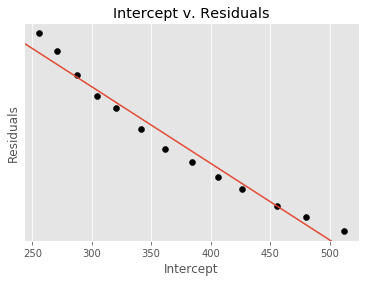

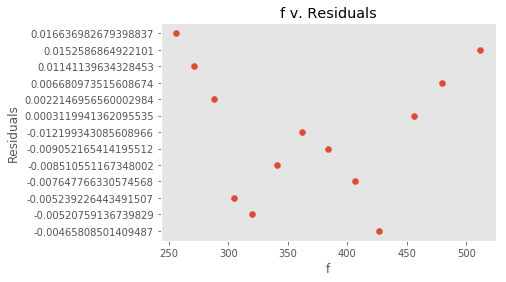

In [58]:
data = pd.read_csv("data/chapter1/speed_of_sound.csv")
explanatory = Q("f")
response = Q("L")
model = LinearModel(explanatory, response)
model.fit(data)
model.plot()
print("regression line: y = " 
      + str(model.bhat["Coefficients"][0]) + " " +  str(model.bhat["Coefficients"][1]) +"x")
model.residual_plots()

From the regression line, we can visualize that frequency and the length of the tube have a strong and negative relationship. In the following notebook, we learn how to interpret the coefficients of our regression and explore how confident we are in our models.